<a href="https://colab.research.google.com/github/skappal7/Data-Science-Projects-Prototypes/blob/master/AirBnB_Predicting_Customer_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1Ztchy5vwth2oX0PSRrQXXLjzTGudH9Ph)

# **PREDICTING CUSTOMER EXPERIENCE USING AIRBnB DATA**

Airbnb has seen a fleeting development since its beginning in 2008 with the number of rentals recorded on its site developing exponentially each year. Airbnb hsa turned out to be a game changer when it comes to the traditional travel and hospitality industry as more and more travelers are looking true value for their money.

This analysis is based on 13,578 unique listing in Lisbon, while the minimum rental in Lisbon stands at 10 dollar in neighborhoods like Campolide,Santa Maria Maior, Santa Clara, SÃ£o Vicente, Avenidas Novas, Areeiro, Carnide and Alvalade. 

The price for a listing ranges from 10 dollars per night to a whopping 4K dollars per night in Benfica.

The aim of this analysis is to identify key indicators that can help us to improve the customer and property experience, ultimatley helping AirBnB Lisbon more business and a positive customer experience.

# **Getting the data into Google Colab environment**

While there are multiple ways to get data into Google Colab environment, however, my preferred way is to get the google drive mounted which saves a lot of time for me. This step is also helpful as within the Google Colab environment once the sessio is terminated your uploaded files etc. will be lost.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
#data=pd.read_excel('/content/gdrive/My Drive/LDAB9.xlsx') but for this analysis I am uploading the dataset directly into my GoogleColab instance, due to some unknown wonky data behavior :-)
data=pd.read_excel('/content/LDAB9.xlsx')

In [ ]:
data.head(3)

room_type  ... words
0  Shared_room  ...   8.0
1  Shared_room  ...   4.0
2  Shared_room  ...  10.0

[3 rows x 10 columns]

# **Firing up PyCaret Environment For Analysis🚀**

PyCaret is an open-source, low-code machine learning library in Python that aims to reduce the cycle time from hypothesis to insights. It is well suited for seasoned data scientists who want to increase the productivity of their ML experiments by using PyCaret in their workflows or for citizen data scientists and those new to data science with little or no background in coding. PyCaret allows you to go from preparing your data to deploying your model within seconds using your choice of notebook environment.

In [ ]:
!pip install pycaret[full]

     |████████████████████████████████| 266kB 31.6MB/s 
     |████████████████████████████████| 1.4MB 38.6MB/s 
     |████████████████████████████████| 276kB 50.5MB/s 
     |████████████████████████████████| 112kB 57.5MB/s 
     |████████████████████████████████| 256kB 48.4MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 14.2MB 183kB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 174kB 60.9MB/s 
     |████████████████████████████████| 1.7MB 47.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8MB 34.6MB/s 
     |████████████████████████████████| 2.0MB 43.2MB/s 
     |████████████████████████████████| 166.7MB 82kB/s 
     |████████████████████████████████| 69.2MB 45kB/s 
     |████████████████████████████████| 102kB 13.5

# **Step 1: Importing a Module**

Depending on the type of experiment you want to perform, one of the six available modules currently supported must be imported in your python environment. Importing a module prepares an environment for specific task. For this analysis we will be using Regression, NLP and probably Classification module to perform series of analysis to make sense of the data and to make predictions.

In [ ]:
from pycaret.regression import *

In [ ]:
reg1 = setup(data = data, target = 'overall_satisfaction', session_id=123,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  ignore_features = ['bathrooms','name','neighborhood'],
                  log_experiment = True, experiment_name = 'hotel1')

Description                 Value
0                               session_id                   123
1                                   Target  overall_satisfaction
2                            Original Data           (13578, 10)
3                           Missing Values                  True
4                         Numeric Features                     2
5                     Categorical Features                     4
6                         Ordinal Features                 False
7                High Cardinality Features                 False
8                  High Cardinality Method                  None
9                    Transformed Train Set            (9504, 46)
10                    Transformed Test Set            (4074, 46)
11                      Shuffle Train-Test                  True
12                     Stratify Train-Test                 False
13                          Fold Generator                 KFold
14                             Fold Number                    10
15                                CPU Jobs                    -1
16                                 Use GPU                 False
17                          Log Experiment                  True
18                         Experiment Name                hotel1
19                                     USI                  16de
20                         Imputation Type                simple
21          Iterative Imputation Iteration                  None
22                         Numeric Imputer                  mean
23      Iterative Imputation Numeric Model                  None
24                     Categorical Imputer              constant
25  Iterative Imputation Categorical Model                  None
26           Unknown Categoricals Handling        least_frequent
27                               Normalize                 False
28                        Normalize Method                  None
29                          Transformation                 False
30                   Transformation Method                  None
31                                     PCA                 False
32                              PCA Method                  None
33                          PCA Components                  None
34                     Ignore Low Variance                 False
35                     Combine Rare Levels                 False
36                    Rare Level Threshold                  None
37                         Numeric Binning                 False
38                         Remove Outliers                 False
39                      Outliers Threshold                  None
40                Remove Multicollinearity                  True
41             Multicollinearity Threshold                  0.95
42                              Clustering                 False
43                    Clustering Iteration                  None
44                     Polynomial Features                 False
45                       Polynomial Degree                  None
46                    Trignometry Features                 False
47                    Polynomial Threshold                  None
48                          Group Features                 False
49                       Feature Selection                 False
50                Feature Selection Method               classic
51            Features Selection Threshold                  None
52                     Feature Interaction                 False
53                           Feature Ratio                 False
54                   Interaction Threshold                  None
55                        Transform Target                 False
56                 Transform Target Method               box-cox

In [ ]:
print(reg1)

(5, False, 123, False, 'lightgbm', -1, 6207     0.0
10834    0.0
4940     0.0
12247    4.0
9131     4.5
        ... 
9031     4.0
13363    5.0
2561     0.0
1633     0.0
697      0.0
Name: overall_satisfaction, Length: 4074, dtype: float32, True, False, None, 'hotel1', '16de', {'iterative_imputation_iters_param', 'fix_imbalance_param', 'seed', 'fold_shuffle_param', 'imputation_regressor', '_gpu_n_jobs_param', 'y_test', 'html_param', 'stratify_param', 'fix_imbalance_method_param', 'exp_name_log', 'USI', 'pycaret_globals', '_available_plots', 'transform_target_param', 'X', 'display_container', 'fold_generator', '_all_models', '_internal_pipeline', 'fold_param', 'n_jobs_param', 'imputation_classifier', 'transform_target_method_param', 'X_test', 'gpu_param', 'y_train', 'y', 'fold_groups_param', 'logging_param', 'data_before_preprocess', '_all_models_internal', 'experiment__', 'master_model_container', 'log_plots_param', 'target_param', 'fold_groups_param_full', '_all_metrics', 'X_train', 'p

# **Comparing Models**

Notice that we have used n_select parameter within compare_models. while the compare_models option by default returns the best performing model (you can sort the model based on the metricof your choice, by default it picks up R2). However you can use n_select parameter to return top N models. In this routine we will compare_models Top 3 of our best performing models and will be further sorting it using RMSLE (Root Mean Squared Logarithmic Error) metric the lower the better.

In [ ]:
top3 = compare_models(exclude = ['ransac'], n_select = 3, sort='RMSLE')

Model           MAE           MSE  \
gbr           Gradient Boosting Regressor  2.015000e-01  8.820000e-02   
lightgbm  Light Gradient Boosting Machine  2.007000e-01  9.080000e-02   
rf                Random Forest Regressor  2.046000e-01  9.870000e-02   
catboost               CatBoost Regressor  2.047000e-01  8.980000e-02   
xgboost         Extreme Gradient Boosting  2.096000e-01  9.650000e-02   
ada                    AdaBoost Regressor  2.162000e-01  1.094000e-01   
et                  Extra Trees Regressor  2.139000e-01  1.143000e-01   
dt                Decision Tree Regressor  2.386000e-01  1.728000e-01   
knn                 K Neighbors Regressor  2.976000e-01  3.104000e-01   
ridge                    Ridge Regression  1.682600e+00  3.579200e+00   
lr                      Linear Regression  1.682700e+00  3.582200e+00   
br                         Bayesian Ridge  1.686300e+00  3.575500e+00   
omp           Orthogonal Matching Pursuit  1.690400e+00  3.590400e+00   
en                            Elastic Net  1.749800e+00  3.722700e+00   
lasso                    Lasso Regression  1.749600e+00  3.723000e+00   
huber                     Huber Regressor  1.605500e+00  3.716700e+00   
llar         Lasso Least Angle Regression  1.963400e+00  4.646600e+00   
par          Passive Aggressive Regressor  4.388000e+00  6.787700e+01   
lar                Least Angle Regression  2.093599e+08  7.960053e+17   

                  RMSE            R2   RMSLE          MAPE  TT (Sec)  
gbr       2.965000e-01  9.810000e-01  0.0571  6.330000e-02     0.529  
lightgbm  3.009000e-01  9.804000e-01  0.0575  6.350000e-02     0.138  
rf        3.138000e-01  9.787000e-01  0.0596  6.510000e-02     1.706  
catboost  2.993000e-01  9.806000e-01  0.0603  6.300000e-02     2.631  
xgboost   3.101000e-01  9.792000e-01  0.0616  6.490000e-02     3.713  
ada       3.304000e-01  9.764000e-01  0.0622  6.720000e-02     0.191  
et        3.375000e-01  9.753000e-01  0.0653  6.780000e-02     2.007  
dt        4.153000e-01  9.627000e-01  0.0782  7.600000e-02     0.048  
knn       5.542000e-01  9.329000e-01  0.1817  8.280000e-02     0.099  
ridge     1.891700e+00  2.282000e-01  0.7356  2.829000e-01     0.025  
lr        1.892500e+00  2.276000e-01  0.7357  2.830000e-01     0.250  
br        1.890800e+00  2.290000e-01  0.7362  2.834000e-01     0.041  
omp       1.894700e+00  2.257000e-01  0.7374  2.843000e-01     0.024  
en        1.929400e+00  1.974000e-01  0.7512  2.936000e-01     0.025  
lasso     1.929400e+00  1.973000e-01  0.7520  2.928000e-01     0.025  
huber     1.927600e+00  1.988000e-01  0.7623  2.340000e-01     0.267  
llar      2.155400e+00 -1.500000e-03  0.8312  2.991000e-01     0.025  
par       7.012300e+00 -1.382280e+01  0.9828  9.013000e-01     0.045  
lar       3.691447e+08 -1.712010e+17  5.0598  4.640663e+07     0.031

In [ ]:
print(top3)

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123

# **Let's see if we can further optmize the Gradient Boosting Regressor Model?**

In [ ]:
gbr1 = create_model('gbr', fold = 10)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.2012  0.0832  0.2885  0.9814  0.0536  0.0613
1     0.1969  0.0776  0.2786  0.9835  0.0510  0.0610
2     0.1989  0.0822  0.2867  0.9817  0.0536  0.0608
3     0.2066  0.1004  0.3169  0.9781  0.0615  0.0667
4     0.1872  0.0773  0.2781  0.9841  0.0518  0.0619
5     0.2082  0.0892  0.2986  0.9807  0.0554  0.0645
6     0.2089  0.1097  0.3312  0.9758  0.0784  0.0636
7     0.2043  0.0889  0.2982  0.9810  0.0557  0.0648
8     0.2045  0.0932  0.3053  0.9800  0.0580  0.0662
9     0.1983  0.0799  0.2827  0.9833  0.0524  0.0622
Mean  0.2015  0.0882  0.2965  0.9810  0.0571  0.0633
SD    0.0062  0.0100  0.0165  0.0024  0.0077  0.0021

In [ ]:
tuned_gbr=tune_model( gbr1 ,optimize='R2')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.2167  0.1000  0.3162  0.9776  0.0603  0.0652
1     0.2087  0.0912  0.3021  0.9806  0.0588  0.0636
2     0.2066  0.0909  0.3014  0.9797  0.0578  0.0623
3     0.2174  0.1106  0.3325  0.9759  0.0657  0.0690
4     0.1965  0.0861  0.2935  0.9823  0.0567  0.0637
5     0.2219  0.1058  0.3252  0.9771  0.0619  0.0677
6     0.2187  0.1219  0.3492  0.9732  0.0826  0.0654
7     0.2178  0.1024  0.3200  0.9781  0.0614  0.0676
8     0.2187  0.1072  0.3274  0.9770  0.0631  0.0699
9     0.2123  0.0929  0.3048  0.9806  0.0587  0.0655
Mean  0.2135  0.1009  0.3172  0.9782  0.0627  0.0660
SD    0.0073  0.0104  0.0162  0.0025  0.0071  0.0024

In [ ]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


# **Plotting the Tuned Model**

Before model finalization, I will use the plot_model() function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

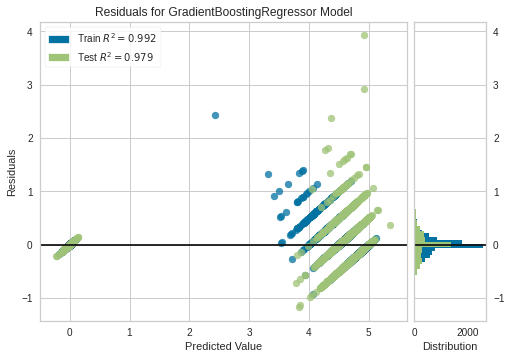

In [ ]:
plot_model(tuned_gbr)

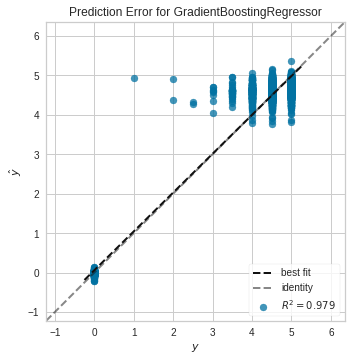

In [ ]:

plot_model(tuned_gbr, plot = 'error')

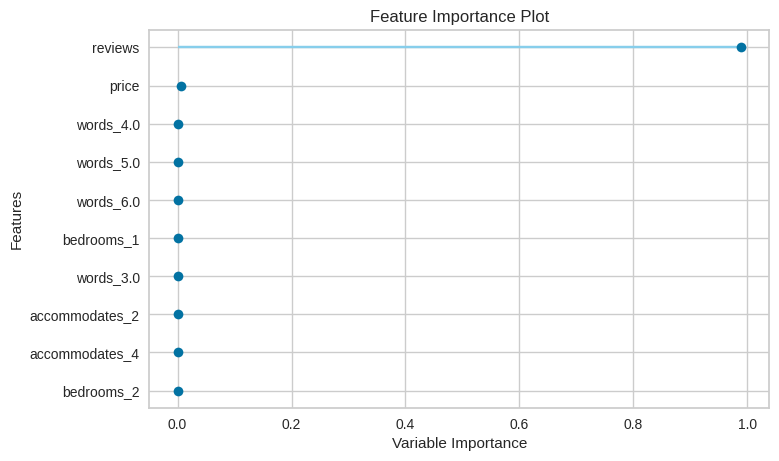

In [ ]:
plot_model(tuned_gbr, plot='feature')

In [ ]:
plot_model(tuned_gbr, plot='residuals_interactive')

In [ ]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Finalizing the Model and Saving the Model**

In [ ]:
final_gbr = finalize_model(tuned_gbr)

In [ ]:
print(final_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
predict_model(final_gbr);

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Gradient Boosting Regressor  0.1371  0.0427  0.2067  0.9907  0.0412  0.0423

In [ ]:
predictions = predict_model(final_gbr, data = data)

In [ ]:
predictions.head(2000)

room_type       neighborhood  ...  words     Label
0         Shared_room     Santo AntÃ³nio  ...    8.0  4.592687
1         Shared_room     Avenidas Novas  ...    4.0  3.543093
2         Shared_room  Santa Maria Maior  ...   10.0  4.514359
3         Shared_room     Avenidas Novas  ...    5.0  4.211109
4         Shared_room            Arroios  ...    5.0  0.001425
...               ...                ...  ...    ...       ...
1995  Entire_home_apt           Alvalade  ...    5.0  4.730286
1996  Entire_home_apt            Arroios  ...    6.0  4.791417
1997  Entire_home_apt            Arroios  ...    2.0  0.009037
1998  Entire_home_apt   Penha de FranÃ§a  ...    4.0  0.045061
1999  Entire_home_apt            Arroios  ...    5.0  4.497084

[2000 rows x 11 columns]

In [ ]:
prediction = pd.DataFrame(predictions, columns=['Id','Label','room_type','overall_satisfaction','bedrooms']).to_csv('prediction.csv')

In [ ]:
save_model(final_gbr,'Final GBR Model 7Jun21')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['bathrooms', 'name',
                                                        'neighborhood'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='overall_satisfaction',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=N...
                                            learning_rate=0.15, loss='ls',
                                            max_depth=7, max_features=1.0,
                                            max_leaf_nodes=None,
                              